# Webscraping and Extracting Data Using Python Library
## Analyzing financial stocks

<p> For this project, I extracted financial data like historical share price and quarterly revenue reportings from various sources using Python libraries and webscraping on popular stocks. After collecting this data I visualized it in a dashboard to identify patterns or trends. The stocks I worked with were Apple, Amazon and AMD.<p>

In [2]:
#!pip install pandas==1.3.3
#!pip install requests==2.26.0
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!mamba install html5lib==1.1 -y
!pip install lxml==4.6.4
#!pip install plotly==5.3.1

/bin/bash: mamba: command not found
/bin/bash: mamba: command not found
  Using cached lxml-4.6.4-cp39-cp39-macosx_10_14_x86_64.whl (4.5 MB)
  Attempting uninstall: lxml
    Found existing installation: lxml 4.8.0
    Uninstalling lxml-4.8.0:
      Successfully uninstalled lxml-4.8.0


## Using Webscraping to Extract Stock Data Example
<p> First we must use the request library to downlaod the webpage, and extract the text. We will extract Netflix stock data https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/amazon_data_webpage.html. <p>

In [3]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [4]:
amazon_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/amazon_data_webpage.html"
amazon = requests.get(amazon_url).text

In [5]:
amazon_soup = BeautifulSoup(amazon, 'html5lib')

In [6]:
tag_object= amazon_soup.title
print("content of title attribute is:",tag_object) 

content of title attribute is: <title>Amazon.com, Inc. (AMZN) Stock Historical Prices &amp; Data - Yahoo Finance</title>


In [7]:
amazon_data = pd.DataFrame(columns = ["Date","Open", "High", "Low", "Close","Volume"])
# First I isolate the body of the table which contains all the information
# Then I loop through each row and find all the column values for each row
for row in amazon_soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    Open = col[1].text
    high = col[2].text
    low = col[3].text
    close = col[4].text
    adj_close = col[5].text
    volume = col[6].text
# Finally I append the data of each row to the table
    amazon_data = amazon_data.append({"Date":date, "Open":Open, "High":high,"Low": low, "Close": close, "Adj_Close": adj_close, "Volume":volume}, ignore_index=True)

In [8]:
amazon_data.head()

,Date,Open,High,Low,Close,Volume,Adj_Close
0,"Jan 01, 2021","3,270.00","3,363.89","3,086.00","3,206.20","71,528,900","3,206.20"
1,"Dec 01, 2020","3,188.50","3,350.65","3,072.82","3,256.93","77,556,200","3,256.93"
2,"Nov 01, 2020","3,061.74","3,366.80","2,950.12","3,168.04","90,810,500","3,168.04"
3,"Oct 01, 2020","3,208.00","3,496.24","3,019.00","3,036.15","116,226,100","3,036.15"
4,"Sep 01, 2020","3,489.58","3,552.25","2,871.00","3,148.73","115,899,300","3,148.73"


<p> I  also used the pandas `read_html` function using the url

In [9]:
read_html_pandas_data = pd.read_html(amazon_url)

<p>I also converted the BeautifulSoup object to a string<p>

In [10]:
read_html_pandas_data = pd.read_html(str(amazon_soup))

In [11]:
amazon_dataframe = read_html_pandas_data[0]

amazon_dataframe.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Jan 01, 2021",3270.00,3363.89,3086.00,3206.20,3206.20,71528900
1,"Dec 01, 2020",3188.50,3350.65,3072.82,3256.93,3256.93,77556200
2,"Nov 01, 2020",3061.74,3366.80,2950.12,3168.04,3168.04,90810500
3,"Oct 01, 2020",3208.00,3496.24,3019.00,3036.15,3036.15,116226100
4,"Sep 01, 2020",3489.58,3552.25,2871.00,3148.73,3148.73,115899300


## Using the yfinance Library to Extract Stock Data
<p>Using the Ticker module I created an object that allowed me to access functions to extract data. I provided the ticker symbol for the stock, here the company is Apple and the ticker symbol is AAPL.

In [12]:
import yfinance as yf

In [13]:
apple = yf.Ticker("AAPL")

<p> Using the attribute  <code>info</code> I extracted information about the stock as a Python dictionary.

In [14]:
apple_info=apple.info
apple_info

{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 154000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; AirPods Max, an over-ear wireless headphone; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, and iPod touch. Further, it provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience wit

### Extracting Share Price
<p> Using the <code>history()</code> method I got the share price of the stock over a certain period of time. Using the 'period' parameter I could set how far back from the present to get data. The options for 'period' are 1 day (1d), 5d, 1 month (1mo) , 3mo, 6mo, 1 year (1y), 2y, 5y, 10y, ytd, and max. <p>


In [15]:
apple_share_price_data = apple.history(period="max")

In [16]:
apple_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12,0.100039,0.100474,0.100039,0.100039,469033600,0.0,0.0
1980-12-15,0.095255,0.095255,0.094820,0.094820,175884800,0.0,0.0
1980-12-16,0.088296,0.088296,0.087861,0.087861,105728000,0.0,0.0
1980-12-17,0.090035,0.090470,0.090035,0.090035,86441600,0.0,0.0
1980-12-18,0.092646,0.093081,0.092646,0.092646,73449600,0.0,0.0


In [17]:
apple_share_price_data.reset_index(inplace=True)

<AxesSubplot:xlabel='Date'>

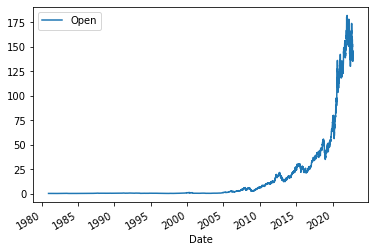

In [18]:
apple_share_price_data.plot(x="Date", y="Open")

### Extracting Dividends
<p> Using the variable 'dividends' I got a dataframe of the data. The period of the data is given by the period defined in the 'history' function. <p>

In [19]:
apple.dividends

Date
1987-05-11    0.000536
1987-08-10    0.000536
1987-11-17    0.000714
1988-02-12    0.000714
1988-05-16    0.000714
                ...   
2021-08-06    0.220000
2021-11-05    0.220000
2022-02-04    0.220000
2022-05-06    0.230000
2022-08-05    0.230000
Name: Dividends, Length: 76, dtype: float64

<AxesSubplot:xlabel='Date'>

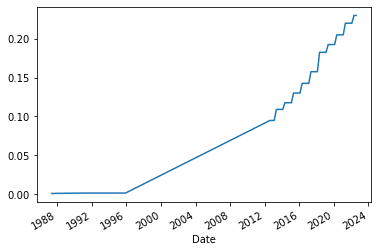

In [20]:
apple.dividends.plot()

## AMD 

In [21]:
amd = yf.Ticker("AMD")

In [22]:
amd_info=amd.info
amd_info

{'zip': '95054',
 'sector': 'Technology',
 'fullTimeEmployees': 15500,
 'longBusinessSummary': 'Advanced Micro Devices, Inc. operates as a semiconductor company worldwide. The company operates in two segments, Computing and Graphics; and Enterprise, Embedded and Semi-Custom. Its products include x86 microprocessors as an accelerated processing unit, chipsets, discrete and integrated graphics processing units (GPUs), data center and professional GPUs, and development services; and server and embedded processors, and semi-custom System-on-Chip (SoC) products, development services, and technology for game consoles. The company provides processors for desktop and notebook personal computers under the AMD Ryzen, AMD Ryzen PRO, Ryzen Threadripper, Ryzen Threadripper PRO, AMD Athlon, AMD Athlon PRO, AMD FX, AMD A-Series, and AMD PRO A-Series processors brands; discrete GPUs for desktop and notebook PCs under the AMD Radeon graphics, AMD Embedded Radeon graphics brands; and professional graphi

In [23]:
amd_info['country']

'United States'

In [24]:
amd_info['sector']

'Technology'

In [25]:
amd_share_price_data = amd.history(period="max")

In [26]:
amd_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-03-17,0.0,3.302083,3.125000,3.145833,219600,0,0.0
1980-03-18,0.0,3.125000,2.937500,3.031250,727200,0,0.0
1980-03-19,0.0,3.083333,3.020833,3.041667,295200,0,0.0
1980-03-20,0.0,3.062500,3.010417,3.010417,159600,0,0.0
1980-03-21,0.0,3.020833,2.906250,2.916667,130800,0,0.0


<AxesSubplot:xlabel='Date'>

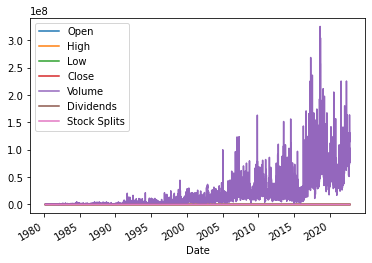

In [27]:
amd_share_price_data.plot()

<AxesSubplot:xlabel='Date'>

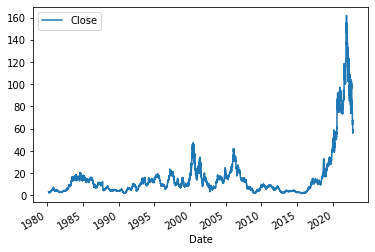

In [28]:
amd_share_price_data.plot(xlabel="Date", y="Close")